## VN30F1M 5m timeframe - volume profile

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
from datetime import date, datetime
from dateutil.relativedelta import relativedelta
import requests

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120

import warnings
warnings.filterwarnings('ignore')

In [23]:
USER_AGENTS = [
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.41 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 12_3_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.41 Safari/537.36",
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.41 Safari/537.36"
]

HEADERS = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
VNDIRECT_DATA_HISTORY_URL = 'https://dchart-api.vndirect.com.vn/dchart/history'
URL = VNDIRECT_DATA_HISTORY_URL

In [24]:
def getStockHistoryData(ticker, timestamp_from=0, timestamp_to=0):
    if timestamp_from == 0:
        three_months = date.today() + relativedelta(months=-3)
        timestamp_from = datetime.strptime(three_months.strftime("%m/%d/%Y") + ', 00:00:0', "%m/%d/%Y, %H:%M:%S")\
            .timestamp()
    if timestamp_to == 0:
        timestamp_to = datetime.strptime(date.today().strftime("%m/%d/%Y") + ', 23:59:00', "%m/%d/%Y, %H:%M:%S")\
            .timestamp()

    params = {
        "resolution": "5",
        "symbol": str(ticker),
        "from": int(timestamp_from),
        "to": int(timestamp_to)
    }

    x = requests.get(URL, params=params, headers=HEADERS)
    response = x.json()

    import numpy as np
    import pandas as pd

    timestamp = np.array(response['t']).astype(int)
    close = np.array(response['c']).astype(float)
    open = np.array(response['o']).astype(float)
    high = np.array(response['h']).astype(float)
    low = np.array(response['l']).astype(float)
    volume = np.array(response['v']).astype(int)

    dataset = pd.DataFrame({'Time': timestamp, 'Open': list(open), 'High': list(high), 'Low': list(low),
                            'Close': list(close), 'Volume': list(volume)},
                           columns=['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
    return dataset

In [25]:
def prepareData(htd):
    if 'Time' in htd.columns:
        from datetime import datetime

        htd['DateStr'] = htd.apply(
            lambda x: datetime.fromtimestamp(x['Time']).strftime("%Y-%m-%d %H:%M:%S"), axis=1)

    htd['Date'] = pd.to_datetime(htd['DateStr'])
    # htd['Date'] = htd['Date'] + pd.DateOffset(hours=7)
    ticker_data = htd.set_index('Date')
    ticker_data.drop(columns=['Time', 'DateStr'], inplace=True)
    return ticker_data

In [26]:
ticker = "VN30F1M"
htd = getStockHistoryData(ticker, 0, 0)
data = prepareData(htd)
data = data.dropna()
data

,Open,High,Low,Close,Volume
Date,,,,,
2024-07-01 09:00:00,1277.7,1279.4,1276.8,1277.5,7924
2024-07-01 09:05:00,1277.5,1277.6,1276.0,1276.7,2247
2024-07-01 09:10:00,1276.8,1277.2,1276.6,1276.8,1713
2024-07-01 09:15:00,1276.9,1277.7,1275.0,1275.4,4143
2024-07-01 09:20:00,1275.5,1275.6,1274.7,1275.0,4204
...,...,...,...,...,...
2024-09-27 14:15:00,1354.0,1354.0,1350.9,1352.5,12708
2024-09-27 14:20:00,1352.9,1354.4,1352.2,1354.0,8024
2024-09-27 14:25:00,1354.0,1356.6,1354.0,1355.6,8764


In [27]:
# ngay dao han phai sinh
data_total = data[(data.index > '2024-08-16 08:00:00') & (data.index < '2024-09-19 23:00:00')]
data_total

,Open,High,Low,Close,Volume
Date,,,,,
2024-08-16 09:00:00,1271.5,1271.5,1269.8,1270.2,9092
2024-08-16 09:05:00,1270.4,1270.4,1269.1,1269.3,3940
2024-08-16 09:10:00,1269.4,1269.8,1269.2,1269.8,2178
2024-08-16 09:15:00,1269.8,1270.2,1269.5,1269.8,3836
2024-08-16 09:20:00,1269.7,1269.9,1269.0,1269.3,1843
...,...,...,...,...,...
2024-09-19 14:15:00,1317.5,1318.7,1316.4,1316.5,5738
2024-09-19 14:20:00,1316.6,1317.4,1316.5,1317.0,2494
2024-09-19 14:25:00,1317.0,1317.2,1316.7,1316.8,4434


In [28]:
data_total['value'] = data_total['Close'] * data_total['Volume']

In [29]:
grpd = data_total.groupby('Close')[['Volume']]
irs = grpd.sum().reset_index()
irs

,Close,Volume
0,1268.4,3518
1,1269.0,2425
2,1269.3,5783
3,1269.4,4407
4,1269.8,6014
...,...,...
429,1333.4,4989
430,1333.5,9798
431,1333.8,6013
432,1333.9,1683


<BarContainer object of 434 artists>

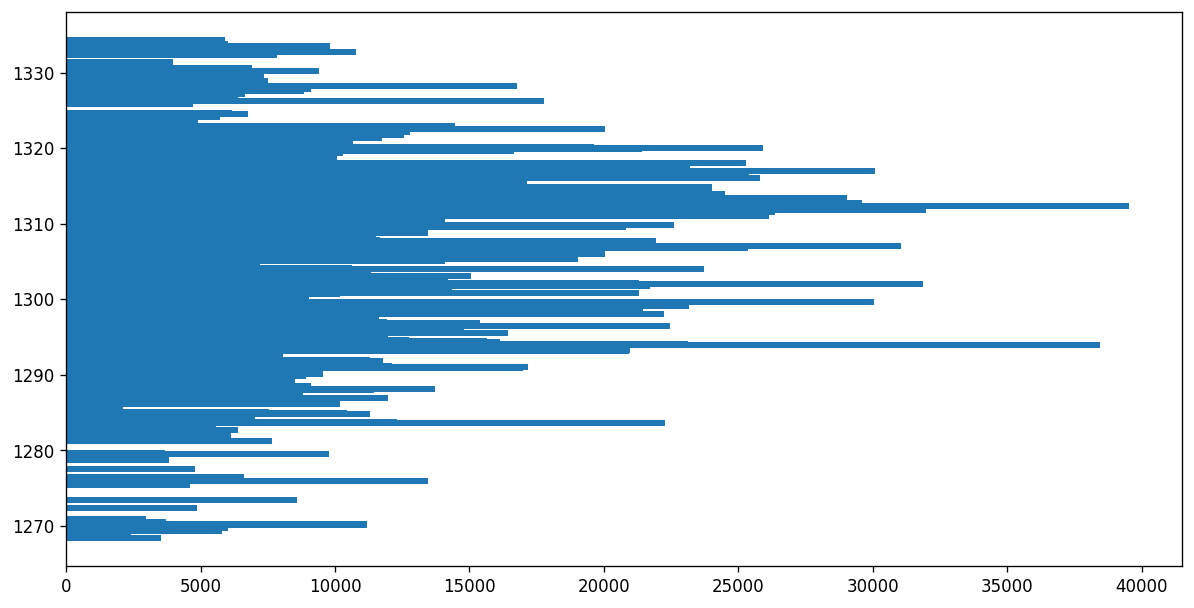

In [30]:
plt.barh(irs['Close'], irs['Volume'])

<BarContainer object of 303 artists>

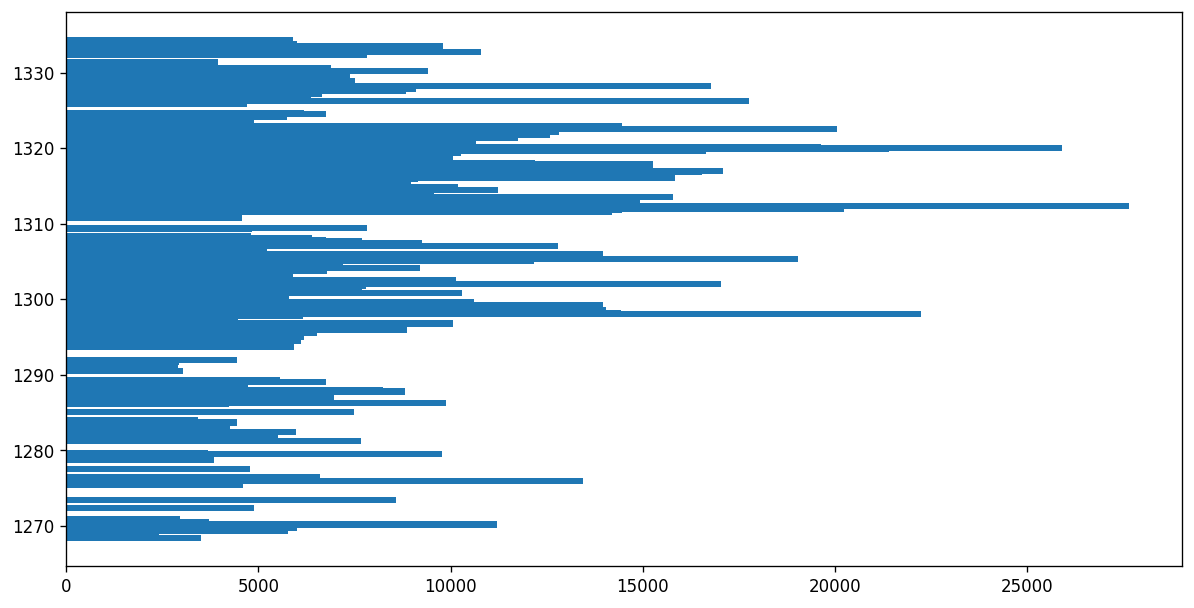

In [31]:
### Ca map gom hang
data_buying = data_total[(data_total.index > '2024-08-16 08:00:00') & (data_total.index < '2024-08-30 23:00:00')]
grpd2 = data_buying.groupby('Close')[['Volume']]
irs2 = grpd2.sum().reset_index()
plt.barh(irs2['Close'], irs2['Volume'])

In [32]:
data_buying['value'].sum() / data_buying['Volume'].sum()

1309.8673427001354

<BarContainer object of 281 artists>

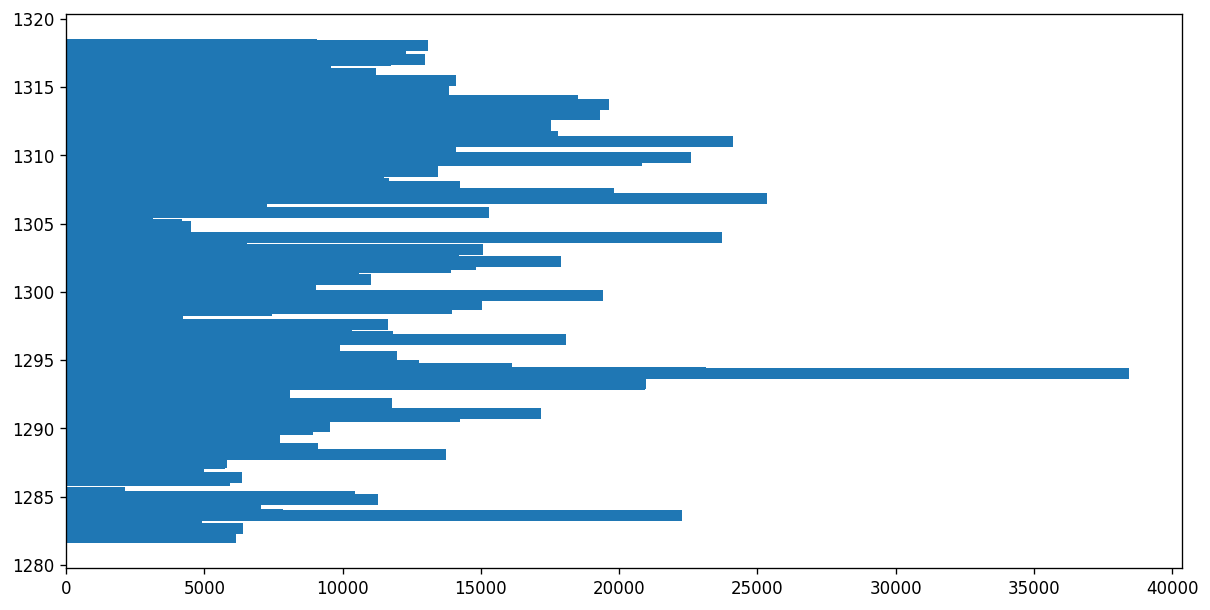

In [33]:
### Ca map xa hang
data_selling = data_total[(data_total.index > '2024-09-01 08:00:00')]
grpd3 = data_selling.groupby('Close')[['Volume']]
irs3 = grpd3.sum().reset_index()
plt.barh(irs3['Close'], irs3['Volume'])

In [34]:
data_selling['value'].sum() / data_selling['Volume'].sum()

1302.4411077047405

In [35]:
data_total['value'].sum() / data_total['Volume'].sum()

1306.0406111257614